In [46]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import scipy.stats as stats

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()['color']

df = pd.read_csv('Customers.csv', delimiter = ',')

df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [47]:
# It will be useful to remove spaces from all collumn names

df = df.rename(columns = {'Annual Income ($)':'Income'})
df = df.rename(columns = {'Spending Score (1-100)':'Score'})
df = df.rename(columns = {'Work Experience':'Work_experience'})
df = df.rename(columns = {'Family Size':'Family_size'})



In [48]:
# Checking if all data types are suit our purposes

df.dtypes

CustomerID          int64
Gender             object
Age                 int64
Income              int64
Score               int64
Profession         object
Work_experience     int64
Family_size         int64
dtype: object

In [49]:
# Checking, if there is null values in dataset. There are 35 cells in Professon section



df.isnull().sum()

CustomerID          0
Gender              0
Age                 0
Income              0
Score               0
Profession         35
Work_experience     0
Family_size         0
dtype: int64

In [50]:
# I filled null cells with unemployed.

df = df.fillna('Unemployed')


,Gender,Age,Income,Score,Profession,Work_experience,Family_size
CustomerID,,,,,,,
1,Male,19,15000,39,Healthcare,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Entertainment,2,6


In [ ]:
# i putted an index as Customer Id

df = df.set_index('CustomerID', inplace=False)

df.head()

In [51]:
df

,Gender,Age,Income,Score,Profession,Work_experience,Family_size
CustomerID,,,,,,,
1,Male,19,15000,39,Healthcare,1,4
2,Male,21,35000,81,Engineer,3,3
3,Female,20,86000,6,Engineer,1,1
4,Female,23,59000,77,Lawyer,0,2
5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...
1996,Female,71,184387,40,Artist,8,7
1997,Female,91,73158,32,Doctor,7,7
1998,Male,87,90961,14,Healthcare,9,2


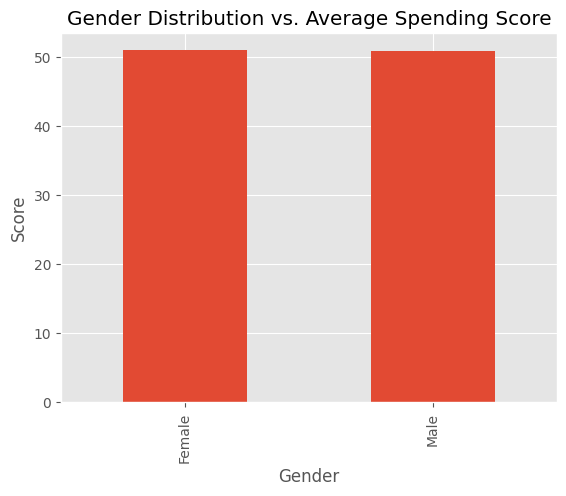

In [52]:
# Q1: How does the gender distribution of our customer base affect their spending score?

gender_spending = df.groupby('Gender')['Score'].mean()

gender_spending.plot(kind='bar', xlabel='Gender', ylabel='Score')
plt.title('Gender Distribution vs. Average Spending Score')
plt.show()

# As we see from the graph, there is no big difference between Gender and Spending Score

In [53]:
# Q2: Is there a correlation between age and annual income of our customers?

correlation = df['Age'].corr(df['Income'])

print("Correlation coefficient between age and annual income:", correlation)

# There is very low correlation between age and income.

Correlation coefficient between age and annual income: 0.02137756590311846


In [54]:
# Q3: Which profession has the highest average spending score among our customers?

average_spending = df.groupby('Profession')['Score'].mean()
highest_spending_profession = average_spending.idxmax()
highest_average_spending = average_spending.max()
print("Profession with the highest average spending score:", highest_spending_profession)
print("Average spending score:", highest_average_spending)

Profession with the highest average spending score: Entertainment
Average spending score: 52.94017094017094


Correlation coefficient between work experience and annual income: 0.08913636838729588


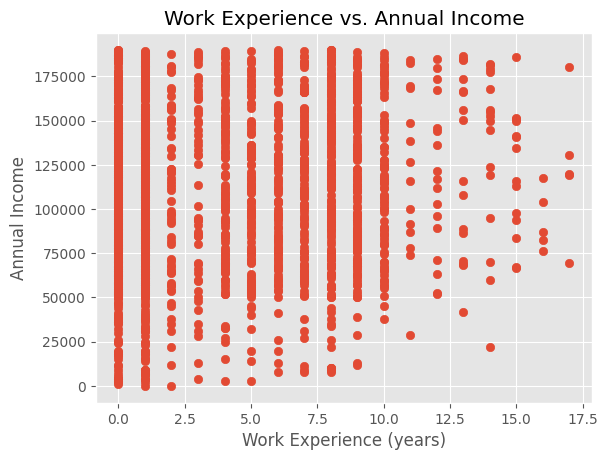

In [55]:
# Q4: 4. Is there a relationship between work experience and annual income of our customers?

correlation = df['Work_experience'].corr(df['Income'])
print("Correlation coefficient between work experience and annual income:", correlation)

plt.scatter(df['Work_experience'], df['Income'])
plt.xlabel('Work Experience (years)')
plt.ylabel('Annual Income')
plt.title('Work Experience vs. Annual Income')
plt.show()

# Low correlation between Work  Experience and Income

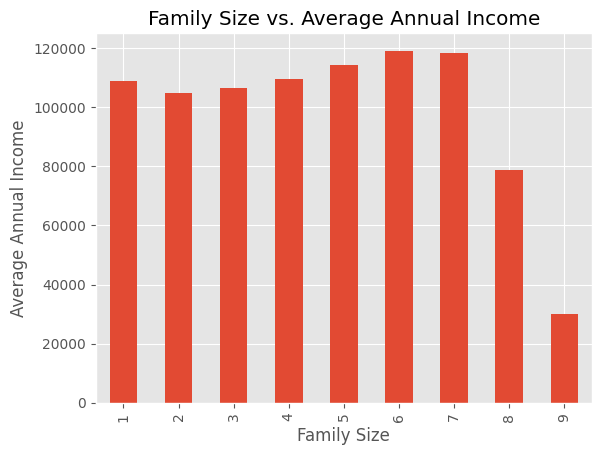

In [56]:
# Q5: How does family size influence the annual income of our customers?

average_income = df.groupby('Family_size')['Income'].mean()

average_income.plot(kind='bar', xlabel='Family Size', ylabel='Average Annual Income')
plt.title('Family Size vs. Average Annual Income')
plt.show()

# As we see that there is not big coverage until 8th member, so people with 8 and 9 family size are earning less in average

In [57]:
# Q6: Are there any significant differences in the spending score based on the gender and age of our customers?

grouped_data = df.groupby(['Gender', 'Age'])['Score'].mean()

anova_results = stats.f_oneway(*[grouped_data[grouped_data.index.get_level_values('Gender') == gender] for gender in df['Gender'].unique()])

print("ANOVA p-value:", anova_results.pvalue)

# 0.7 is strong variable to not reject the hypothesis , that there are no diffences between score, age and gender

ANOVA p-value: 0.7218983494363371
